# Day 1

We calculate the log(likelihood) on each gridding point of (mean(vr), dispersion(vr)) 

This notebook uses python broadcast to calculate the likelihood and slightly different plotting styles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data_path = '../Materials/data/'

In [3]:
df = pd.read_csv(data_path+'Cas3_total.csv')


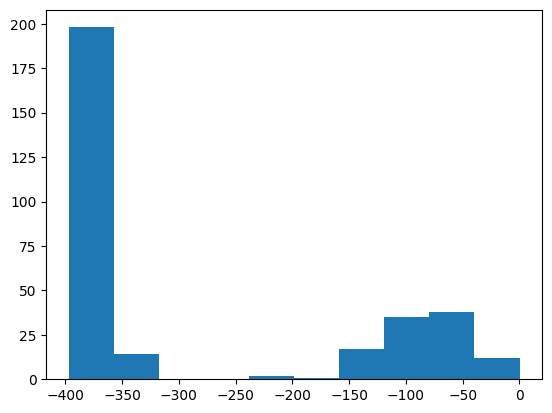

In [4]:
plt.figure()
plt.hist(df['vr']);

In [5]:
ind_dg = df['vr'] <= -300


In [6]:
dg = df[ind_dg]
vr_cas3 = np.array(dg['vr'])
print (len(vr_cas3))

212


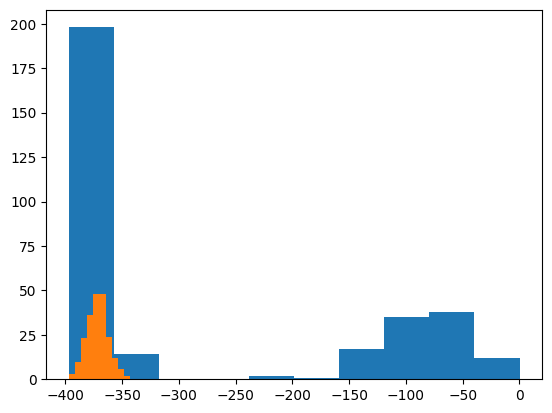

In [7]:
plt.figure()
plt.hist(df['vr']);
plt.hist(dg['vr']);

In [8]:
# Now let's create a grid of 50x50 points in the range of -380 to -360 for mvr and 7 to 12 for dvr
mvr_grid = np.array(np.arange(-380, -360, .4))
dvr_grid = np.array(np.arange(7, 12, 0.1))

In [9]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood1(mu, sigma, x):

    
    logL = -np.log(sigma * np.sqrt(2 * np.pi)) - ((x - mu)**2) / (2 * sigma**2)

    return logL

In [16]:
print("Shapes:")
print("mvr_grid:", mvr_grid.shape)  # Should be 50,)
print("dvr_grid:", dvr_grid.shape)  # Should be (50,)
print("vr_cas3:", vr_cas3.shape)    # Should be (212,)

Shapes:
mvr_grid: (50,)
dvr_grid: (50,)
vr_cas3: (212,)


In [11]:
# We can use the braodcasting feature of numpy to calculate the log(L) for all gridding points at once
logL_grid = log_Likelihood1(mvr_grid[:, np.newaxis, np.newaxis], dvr_grid[np.newaxis, :, np.newaxis], vr_cas3[np.newaxis, np.newaxis, :] )

In [17]:
# We need to sum the log(L) over the third axis (the vr_cas3 axis) to get a 2D grid of log(L) values
logL_2D_sum = np.sum(logL_grid, axis=2)


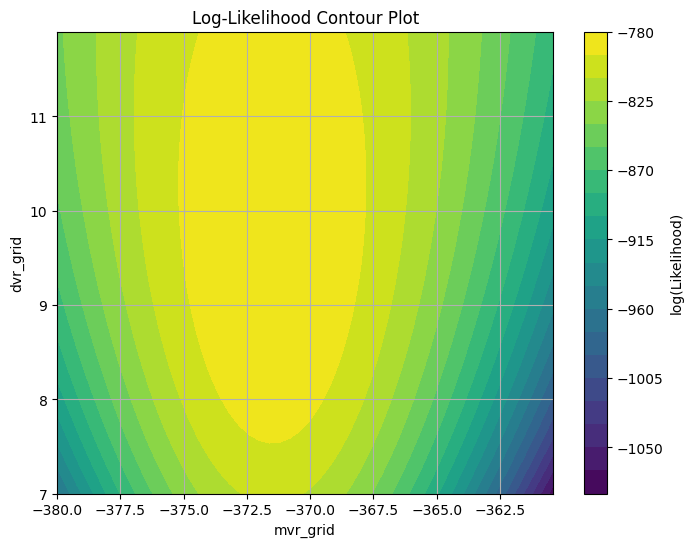

In [18]:
M, D = np.meshgrid(mvr_grid, dvr_grid)  # Shapes (50, 50)

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, D, logL_2D_sum.T, levels=20, cmap='viridis')
plt.colorbar(contour, label='log(Likelihood)')
plt.xlabel('mvr_grid')
plt.ylabel('dvr_grid')
plt.title('Log-Likelihood Contour Plot')
plt.grid(True)
plt.show()

In [19]:
# Let's get the likelihood values instead! 
# In order to do that, we need to the maximum likelihood vaues, as well as parameters that give the maximum likelihood
print (np.max(logL_grid))

max_indices = np.where(logL_2D_sum == np.max(logL_2D_sum))
max_row, max_col = max_indices[0][0], max_indices[1][0]

print (max_row, max_col)
print(mvr_grid[max_row], dvr_grid[max_col])

-2.8648486822599857
21 26
-371.6000000000005 9.59999999999999


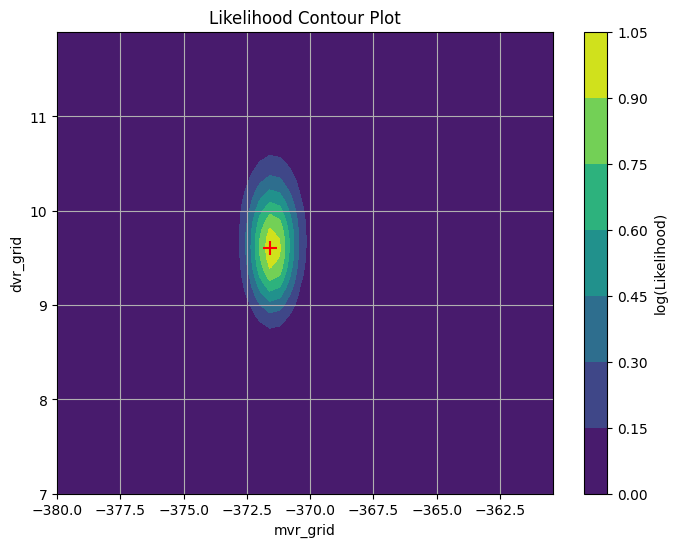

In [21]:
M, D = np.meshgrid(mvr_grid, dvr_grid)  # Shapes (50, 50)

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, D, np.exp(logL_2D_sum.T-np.max(logL_2D_sum)), levels=6, cmap='viridis')
plt.colorbar(contour, label='log(Likelihood)')
plt.scatter(mvr_grid[max_row], dvr_grid[max_col], marker="+", color='red', s=100)

plt.xlabel('mvr_grid')
plt.ylabel('dvr_grid')
plt.title('Likelihood Contour Plot')
plt.grid(True)
plt.show()